<FONT COLOR="RED" SIZE="6">FEATURE SELECTION: Wrapper Methods</FONT>
<P><FONT COLOR="yELLOW" SIZE="4">3_Sequential_Feature_Selection_BACKWARD</FONT>

Backward Elimination is another feature selection technique that starts with all features in the model and iteratively removes the least significant feature until no further improvement is observed. This is particularly useful when you want to identify the most impactful features for your model.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
import numpy as np

In [2]:
# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
# Initialize the classifier
clf = RandomForestClassifier(random_state=42)


In [4]:
# Perform Backward Elimination
sfs = SequentialFeatureSelector(clf, direction="backward", scoring="accuracy", cv=5)
sfs.fit(X_train, y_train)


SequentialFeatureSelector(direction='backward',
                          estimator=RandomForestClassifier(random_state=42),
                          scoring='accuracy')

In [5]:
# Get the selected features
selected_features = sfs.get_support()
selected_feature_names = np.array(feature_names)[selected_features]


In [6]:
# Print selected features
print("Selected features (Backward Elimination):", selected_feature_names)


Selected features (Backward Elimination): ['total_phenols' 'flavanoids' 'nonflavanoid_phenols' 'proanthocyanins'
 'color_intensity' 'od280/od315_of_diluted_wines' 'proline']


In [7]:
# Evaluate performance with the selected features
clf.fit(X_train[:, selected_features], y_train)
accuracy = clf.score(X_test[:, selected_features], y_test)
print(f"Test accuracy with selected features: {accuracy:.2f}")

Test accuracy with selected features: 0.96


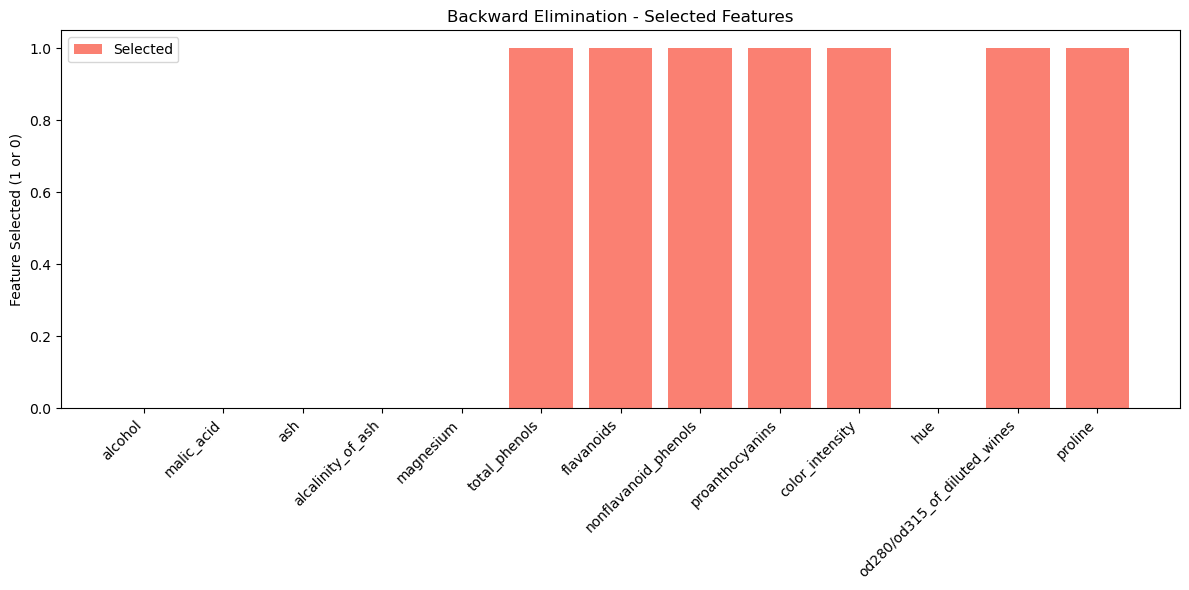

In [8]:
# Plot feature selection results
feature_indices = np.arange(len(feature_names))
plt.figure(figsize=(12, 6))
plt.bar(feature_indices, selected_features.astype(int), color="salmon", label="Selected")
plt.xticks(feature_indices, feature_names, rotation=45, ha="right")
plt.ylabel("Feature Selected (1 or 0)")
plt.title("Backward Elimination - Selected Features")
plt.legend()
plt.tight_layout()
plt.show()